In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv('used_cars.csv')
cars.head()

,Unnamed: 0,Brand,Model,Year,Fuel,Driven Kilometers,Owner,Location,Price
0,0,Skoda,Fabia,2009.0,PETROL,86000.0 KM,Owner\n2nd,"Location\nAnant Nagar, Nagpur","₹ 1,70,000"
1,1,Audi,6,2012.0,DIESEL,50500.0 KM,Owner\n1st,"Location\nJubilee Hills, Hyderabad","₹ 10,90,000"
2,2,Bmw 5,Series,2015.0,DIESEL,144000.0 KM,Owner\n1st,"Location\nRS Puram, Coimbatore","₹ 26,00,000"
3,3,Renau,t Duster,2014.0,DIESEL,30000 KM,Owner\nFirst,"Location\nDr Mukherjee Nagar, Delhi","₹ 4,25,000"
4,4,Chevr,let Beat,2011.0,CNG,120000 KM,Owner\nSecond,"Location\nSector 74, Noida","₹ 1,50,000"


In [3]:
cars.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [4]:
cars.shape

(5047, 8)

In [5]:
cars.describe()

,Brand,Model,Year,Fuel,Driven Kilometers,Owner,Location,Price
count,5032,5023,5031,5047,5047,5047,5047,5047
unique,197,781,40,11,4325,14,187,3451
top,Maruti,Grand i10,2017,Petrol,-,1st Owner,DELHI,-
freq,1323,156,904,3563,30,3960,1204,30


In [6]:
cars.isnull().sum()

Brand                15
Model                24
Year                 16
Fuel                  0
Driven Kilometers     0
Owner                 0
Location              0
Price                 0
dtype: int64

In [7]:
cars.head()

,Brand,Model,Year,Fuel,Driven Kilometers,Owner,Location,Price
0,Skoda,Fabia,2009.0,PETROL,86000.0 KM,Owner\n2nd,"Location\nAnant Nagar, Nagpur","₹ 1,70,000"
1,Audi,6,2012.0,DIESEL,50500.0 KM,Owner\n1st,"Location\nJubilee Hills, Hyderabad","₹ 10,90,000"
2,Bmw 5,Series,2015.0,DIESEL,144000.0 KM,Owner\n1st,"Location\nRS Puram, Coimbatore","₹ 26,00,000"
3,Renau,t Duster,2014.0,DIESEL,30000 KM,Owner\nFirst,"Location\nDr Mukherjee Nagar, Delhi","₹ 4,25,000"
4,Chevr,let Beat,2011.0,CNG,120000 KM,Owner\nSecond,"Location\nSector 74, Noida","₹ 1,50,000"


In [8]:
cars['Price'] = cars['Price'].str.replace("₹","")

In [9]:
cars['Price'] = cars['Price'].str.replace(",","")

In [10]:
cars['Price'] = cars['Price'].str.replace("\n","")

In [11]:
cars['Price'] = cars['Price'].replace(['-','--'],[np.nan, np.nan])

In [12]:
cars['Price'].isnull().sum()

30

In [13]:
cars['Price'] = cars['Price'].fillna(method= 'bfill')

In [14]:
cars['Price'].isnull().sum()

0

In [15]:
cars['Price'] = cars['Price'].str.join('')

In [16]:
a = []
for i in cars['Price']:
    i = i[:7]
    a.append(i)

In [17]:
cars['Price'] = pd.Series(a)

In [18]:
cars['Price'] = cars['Price'].str.replace('e','')

In [19]:
cars['Price'] = pd.to_numeric(cars['Price'])

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              5032 non-null   object
 1   Model              5023 non-null   object
 2   Year               5031 non-null   object
 3   Fuel               5047 non-null   object
 4   Driven Kilometers  5047 non-null   object
 5   Owner              5047 non-null   object
 6   Location           5047 non-null   object
 7   Price              5047 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 315.6+ KB


1. Brand

In [21]:
cars['Brand'].unique()

array(['Skoda', 'Audi ', 'Bmw 5', 'Renau', 'Chevr', 'Hyund', 'Marut', '-',
       'Toyot', 'Tata ', 'Ashok', 'Honda', 'Ford ', 'Mahin', 'Volks',
       'Merce', 'Jeep ', 'Nissa', 'Datsu', 'Bmw 3', 'Bajaj', 'Eiche',
       ' Maruti ', ' Hyunda', ' Maruti Bale', ' Mahindra X', ' Hyundai ',
       ' Maruti B', ' Honda', ' Ford Eco', ' Mahindra KU', ' Maruti Wa',
       ' Maruti Alt', ' Toyota Etios', ' Renault', ' Hyundai Gran',
       ' Maruti S-P', ' Maruti Vitara B', ' Toyota ', ' Maruti',
       ' Honda ', ' Tata ', ' Maruti Swift ', ' Maruti SX4 S ',
       ' Maruti Ce', ' Volkswagen', nan, ' Maruti Cele', ' Ford',
       ' Volkswagen ', ' Jeep Co', ' Toyota G', ' Mahindra TU',
       ' Nissan Micra A', ' Mahindra', ' Renault T', ' Nissan ',
       ' Datsun R', ' Hyundai S', ' Skoda ', ' Toyota Etios ', ' MG H',
       ' Maruti E', ' Hyundai Grand i10', ' Hyundai i20 A',
       ' Ford Figo A', ' Maruti Wagon R Sti', ' Toyota Innova C',
       ' Toyota Corolla ', ' Tata Ha', ' Dats', 

In [22]:
cars['Brand'] = cars['Brand'].replace(["-"],[np.nan])

In [23]:
cars['Brand'].isnull().sum()

31

In [24]:
cars['Brand'] = cars['Brand'].fillna(method= 'bfill')

In [25]:
cars['Brand'].isnull().sum()

0

In [26]:
a = []
for i in cars['Brand']:
    i = i[0]
    a.append(i)

In [27]:
cars['Brand'] = pd.Series(a)

In [28]:
cars['Brand'].unique()

array(['S', 'A', 'B', 'R', 'C', 'H', 'M', 'T', 'F', 'V', 'J', 'N', 'D',
       'E', ' ', 'K'], dtype=object)

In [29]:
cars['Brand'] = cars['Brand'].replace([' '], np.nan)

In [30]:
cars['Brand'].isnull().sum()

1195

In [31]:
cars['Brand'] = cars['Brand'].fillna(method= 'bfill')

In [32]:
cars['Brand'].isnull().sum()

0

In [33]:
cars['Brand'].unique()

array(['S', 'A', 'B', 'R', 'C', 'H', 'M', 'T', 'F', 'V', 'J', 'N', 'D',
       'E', 'K'], dtype=object)

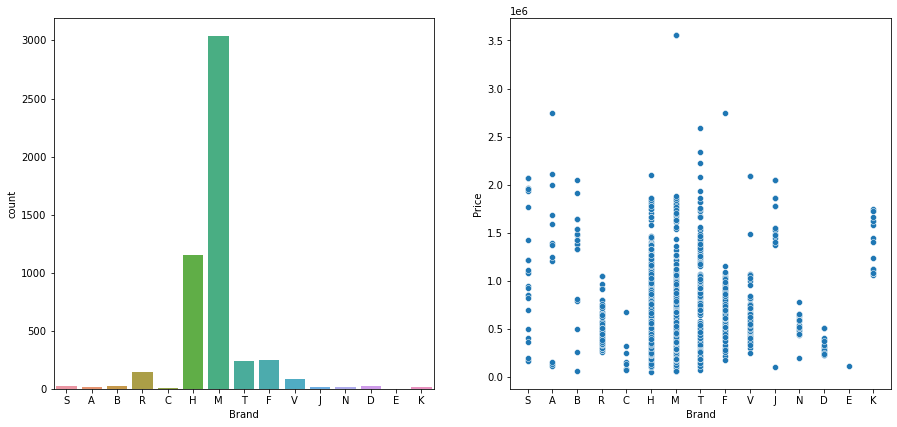

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Brand'])
plt.xlabel('Brand')
plt.subplot(222)
sns.scatterplot(x= 'Brand', y= 'Price', data= cars)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

2. Model

In [35]:
cars['Model'].unique()

array(['Fabia ', '6 ', 'Series ', 't Duster ', 'let Beat ', 'i I20 ',
       ' Suzuki Wagon R ', ' Suzuki Swift Dzire ', nan, ' Suzuki Omni ',
       ' Qualis ', 't Kwid ', 'i Santro ', 'afari ', 'Leyland Others ',
       ' Suzuki Swift ', 'City ', 'cosport ', 'Superb ', ' Suzuki Ciaz ',
       ' Suzuki Celerio ', 'ra Xuv500 ', ' Suzuki Ciaz S ',
       ' Corolla Altis ', 'ra Bolero Pik-Up ', 'i Verna ', 'i Eon ',
       'let Spark ', 'i Fluidic Verna ', ' Innova Crysta ', 'agen Polo ',
       ' Suzuki Baleno ', ' Suzuki Ertiga ', 'let Cruze ',
       'es Benz C-Class ', ' Suzuki Estilo ', ' Suzuki 800 ',
       ' Suzuki Eeco ', 'es-Benz Cla ', 'umo ', 'anza ',
       ' Suzuki Vitara Brezza ', ' Suzuki Alto K10 ', 'ra Thar ',
       'Amaze ', 'ra Xylo ', ' Suzuki Alto ', 'i Santro Xing ',
       'ra Jeep ', ' Suzuki Zen ', 'agen Vento ', 'i I10 ', 'ustang ',
       'i Accent ', 'ra Xuv300 ', 'ra Scorpio ', 'ompass ', 'igo ',
       'enon Xt ', ' Etios ', ' Sunny ', ' Go ', 'i Grand I10

In [36]:
cars['Model'] = cars['Model'].replace(["-"], np.nan)

In [37]:
cars['Model'].isnull().sum()

30

In [38]:
cars['Model'] = cars['Model'].fillna(method= 'bfill')

In [39]:
a = []
for i in cars['Model']:
    i = i[0]
    a.append(i)

In [40]:
cars['Model'] = pd.Series(a)

In [41]:
cars['Model'].unique()

array(['F', '6', 'S', 't', 'l', 'i', ' ', 'a', 'L', 'C', 'c', 'r', 'e',
       'u', 'A', 'o', 'J', 'B', 'n', '4', 'O', 'W', 'U', 'V', 's', 'g',
       'I', 'd', 'E', 'T', 'D', 'X', 'm', 'K', 'R', 'N', 'Y', 'P', '0',
       'H', '-', 'Z', 'G', 'w', 'x', 'M'], dtype=object)

In [42]:
cars['Model'] = cars['Model'].replace(['-',' '],[np.nan, np.nan])

In [43]:
cars['Model'].isnull().sum()

1347

In [44]:
cars['Model'] = cars['Model'].fillna(method= 'bfill')

In [45]:
cars['Model'].isnull().sum()

0

In [46]:
cars['Model'].unique()

array(['F', '6', 'S', 't', 'l', 'i', 'a', 'L', 'C', 'c', 'r', 'e', 'u',
       'A', 'o', 'J', 'B', 'n', '4', 'O', 'W', 'U', 'V', 's', 'g', 'I',
       'd', 'E', 'T', 'D', 'X', 'm', 'K', 'R', 'N', 'Y', 'P', '0', 'H',
       'Z', 'G', 'w', 'x', 'M'], dtype=object)

In [47]:
cars['Model'] = cars['Model'].replace(['t','l','i','a','c','r','e','u','o','n','s','g','d','m'],
                                      ['T','L','I','A','C','R','E','U','O','N','S','G','D','M'])
cars['Model'] = cars['Model'].replace(['6','4','0'],['F','D','O'])

In [48]:
cars['Model'] = cars['Model'].replace(['w','x'],['W','X'])

In [49]:
cars['Model'].unique()

array(['F', 'S', 'T', 'L', 'I', 'A', 'C', 'R', 'E', 'U', 'O', 'J', 'B',
       'N', 'D', 'W', 'V', 'G', 'X', 'M', 'K', 'Y', 'P', 'H', 'Z'],
      dtype=object)

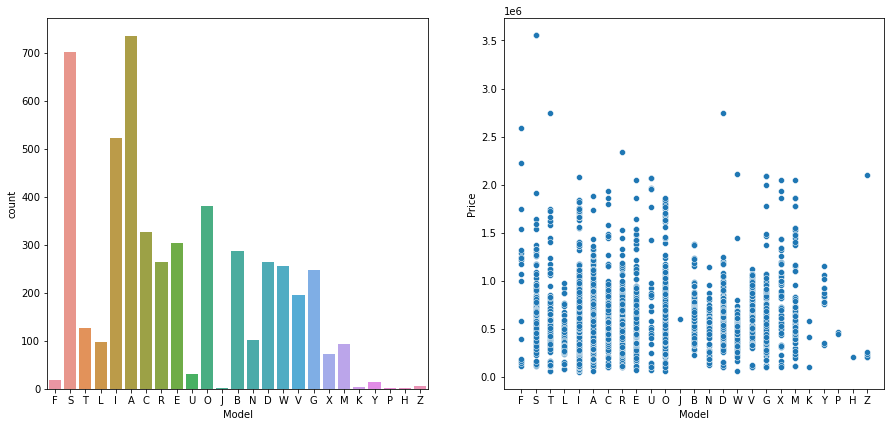

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Model'])
plt.xlabel('Model')
plt.subplot(222)
sns.scatterplot(x= 'Model', y= 'Price', data= cars)
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

3. Year

In [51]:
cars['Year'].unique()

array(['2009.0', '2012.0', '2015.0', '2014.0', '2011.0', '2008.0',
       '2013.0', nan, '1999.0', '2003.0', '2018.0', '2001.0', '2007.0',
       '2017.0', '2016.0', '2021.0', '2010.0', '2022.0', '2019.0',
       '2005.0', '2020.0', '2006.0', '1990.0', '2004.0', '2012', '2016',
       '2017', '2019', '2018', '2014', '2020', '2015', '2011', '2013',
       '-', '2021', '2010', '2009', '2008', '2007', '2003'], dtype=object)

In [52]:
cars['Year'] = cars['Year'].replace(['-'],[np.nan])

In [53]:
cars['Year'].isnull().sum()

30

In [54]:
cars['Year'] = cars['Year'].fillna(method= 'bfill')

In [55]:
cars['Year'].unique()

array(['2009.0', '2012.0', '2015.0', '2014.0', '2011.0', '2008.0',
       '2013.0', '1999.0', '2003.0', '2018.0', '2001.0', '2007.0',
       '2017.0', '2016.0', '2021.0', '2010.0', '2022.0', '2019.0',
       '2005.0', '2020.0', '2006.0', '1990.0', '2004.0', '2012', '2016',
       '2017', '2019', '2018', '2014', '2020', '2015', '2011', '2013',
       '2021', '2010', '2009', '2008', '2007', '2003'], dtype=object)

In [56]:
cars['Year'] = pd.to_numeric(cars['Year'])

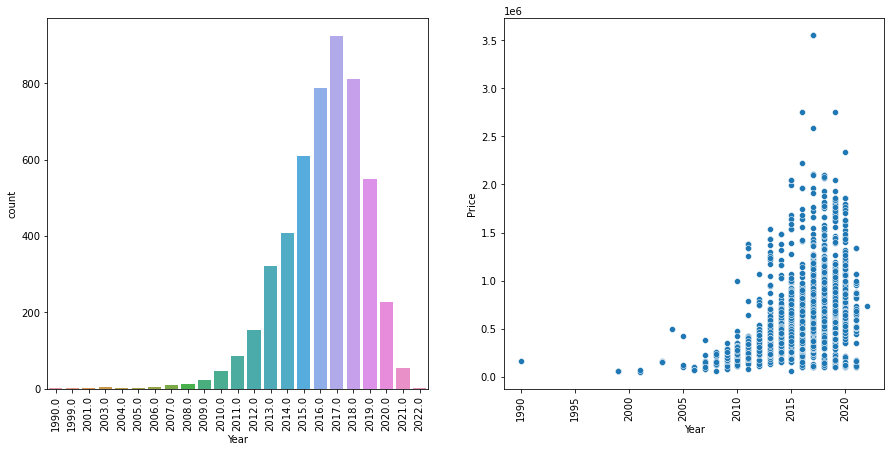

In [57]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Year'])
plt.xlabel('Year')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Year', y= 'Price', data= cars)
plt.xlabel('Year')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

4. Fuel

In [58]:
cars['Fuel'].unique()

array(['PETROL', 'DIESEL', 'CNG', '-', 'CNG & HYBRIDS', '--', 'LPG',
       'Petrol', 'Diesel', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [59]:
cars['Fuel'] = cars['Fuel'].replace(['-','--'],[np.nan,np.nan])

In [60]:
cars['Fuel'].isnull().sum()

31

In [61]:
cars['Fuel'] = cars['Fuel'].fillna(method= 'bfill')

In [62]:
cars['Fuel'].isnull().sum()

0

In [63]:
cars['Fuel'].unique()

array(['PETROL', 'DIESEL', 'CNG', 'CNG & HYBRIDS', 'LPG', 'Petrol',
       'Diesel', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [64]:
cars['Fuel'] = cars['Fuel'].replace(['PETROL','DIESEL'],['Petrol','Diesel'])

In [65]:
cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'CNG & HYBRIDS', 'LPG', 'Petrol + CNG',
       'Petrol + LPG'], dtype=object)

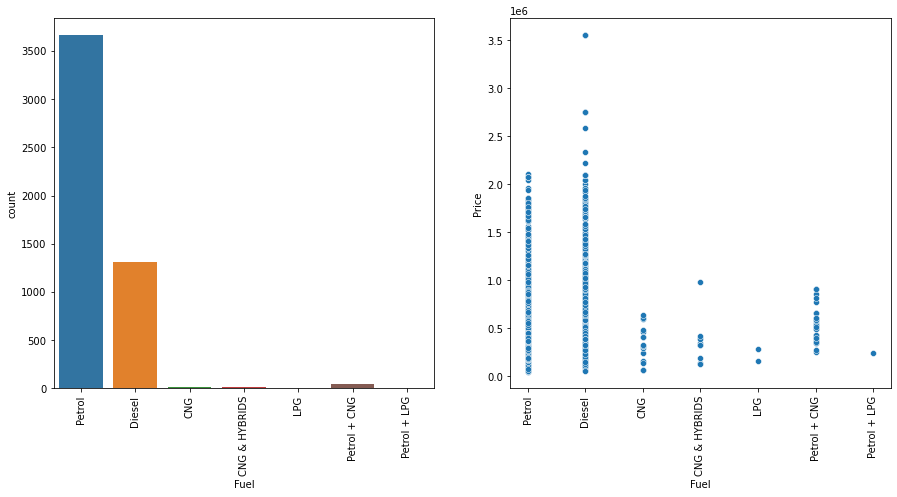

In [66]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Fuel'])
plt.xlabel('Fuel')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Fuel', y= 'Price', data= cars)
plt.xlabel('Fuel')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

5. Driven Kilometers

In [67]:
cars['Driven Kilometers'].unique()

array(['86000.0 KM', '50500.0 KM', '144000.0 KM', ..., '13,465 km',
       '17,916 km', '26,166 km'], dtype=object)

In [68]:
cars['Driven Kilometers'] = cars['Driven Kilometers'].replace(['-'],[np.nan])

In [69]:
cars['Driven Kilometers'].isnull().sum()

30

In [70]:
cars['Driven Kilometers'] = cars['Driven Kilometers'].fillna(method= 'bfill')

In [71]:
cars['Driven Kilometers'].isnull().sum()

0

In [72]:
a = []
for i in cars['Driven Kilometers']:
    i = i[:-3]
    a.append(i)

In [73]:
cars['Driven Kilometers'] = pd.Series(a)

In [74]:
cars['Driven Kilometers'] = cars['Driven Kilometers'].str.replace(',','')

In [75]:
cars['Driven Kilometers'] = cars['Driven Kilometers'].replace(['--'], np.nan)

In [76]:
cars['Driven Kilometers'].isnull().sum()

1

In [77]:
cars['Driven Kilometers'] = cars['Driven Kilometers'].fillna(method= 'bfill')

In [78]:
cars['Driven Kilometers'].isnull().sum()

0

In [79]:
cars['Driven Kilometers'] = pd.to_numeric(cars['Driven Kilometers'])

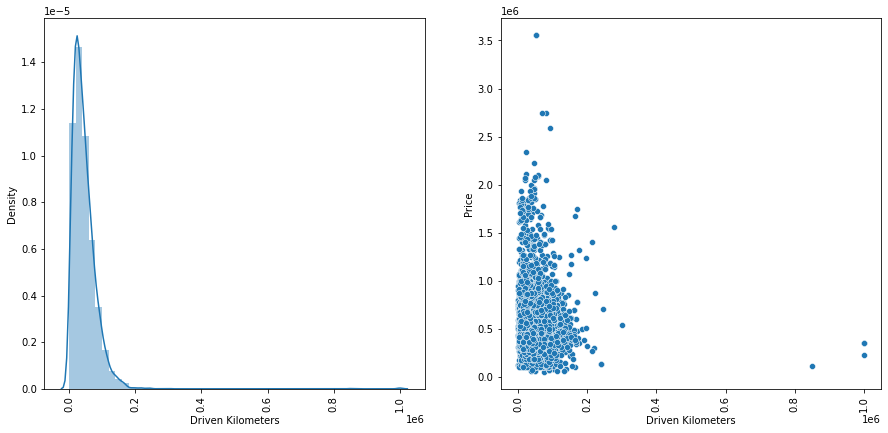

In [80]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(cars['Driven Kilometers'])
plt.xlabel('Driven Kilometers')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Driven Kilometers', y= 'Price', data= cars)
plt.xlabel('Driven Kilometers')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

6. Owner

In [81]:
cars['Owner'].unique()

array(['Owner\n2nd', 'Owner\n1st', 'Owner\nFirst', 'Owner\nSecond',
       'Owner\n3rd', '-', 'Owner\n4th', 'Owner\n--', 'Owner\nThird',
       'Owner\nFourth', '2nd Owner', '1st Owner', '3rd Owner',
       '4th Owner'], dtype=object)

In [82]:
cars['Owner'] = cars['Owner'].replace(['-','Owner\n--'],[np.nan, np.nan])

In [83]:
cars['Owner'].isnull().sum()

33

In [84]:
cars['Owner'] = cars['Owner'].fillna(method= 'bfill')

In [85]:
cars['Owner'].isnull().sum()

0

In [86]:
cars['Owner'].unique()

array(['Owner\n2nd', 'Owner\n1st', 'Owner\nFirst', 'Owner\nSecond',
       'Owner\n3rd', 'Owner\n4th', 'Owner\nThird', 'Owner\nFourth',
       '2nd Owner', '1st Owner', '3rd Owner', '4th Owner'], dtype=object)

In [87]:
cars['Owner'] = cars['Owner'].replace(['Owner\n2nd', 'Owner\n1st', 'Owner\nFirst', 'Owner\nSecond',
                                       'Owner\n3rd', 'Owner\n4th', 'Owner\nThird', 'Owner\nFourth',
                                       '2nd Owner', '1st Owner', '3rd Owner', '4th Owner'],[2,1,1,2,3,4,3,4,2,1,3,4])

In [88]:
cars['Owner'].unique()

array([2, 1, 3, 4], dtype=int64)

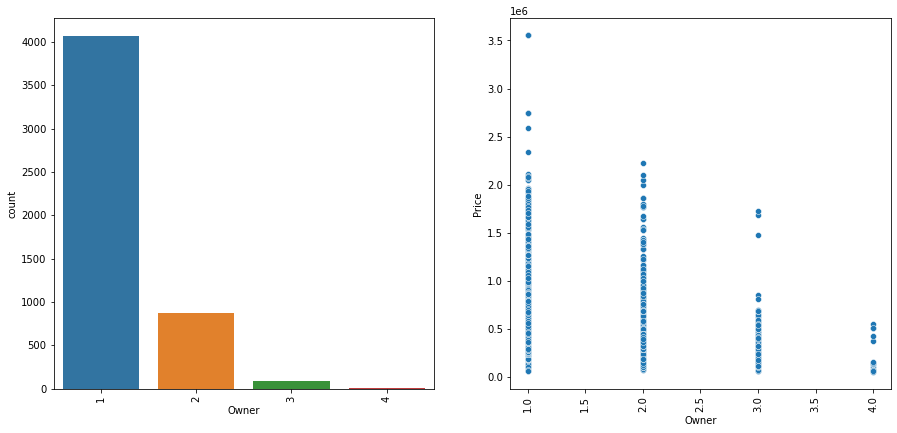

In [89]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Owner'])
plt.xlabel('Owner')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Owner', y= 'Price', data= cars)
plt.xlabel('Owner')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

7. Locations

In [90]:
cars['Location'].unique()

array(['Location\nAnant Nagar, Nagpur',
       'Location\nJubilee Hills, Hyderabad',
       'Location\nRS Puram, Coimbatore',
       'Location\nDr Mukherjee Nagar, Delhi',
       'Location\nSector 74, Noida', 'Location\nKamakshipalya, Bengaluru',
       'Location\nChitaipur, Varanasi', 'Location\nSEVOKE ROAD, Siliguri',
       '-', 'Location\nNTPC Township, Haripad',
       'Location\nVijaya Nagar Colony, Hyderabad',
       'Location\nJuhi, Kanpur', 'Location\nGomti Nagar, Lucknow',
       'Location\nMIDC, Ahmadnagar', 'Location\nOyoor, Kollam',
       'Location\nMajathia Enclave, Patiala',
       'Location\nSector 128, Noida',
       'Location\nCheenivila, Kanjiramkulam',
       'Location\nAnand Vihar, Delhi', 'Location\nViman Nagar, Pune',
       'Location\nPWD Colony, Jodhpur',
       'Location\nBhangel, Greater Noida', 'Location\nMira Road, Mumbai',
       'Location\nPattambi, Palakkad', 'Location\nSector 18D, Chandigarh',
       'Location\nRohini Sector 7, Delhi', 'Location\nSherp

In [91]:
cars['Location'] = cars['Location'].str.replace('Location\n','')

In [92]:
cars['Location'] = cars['Location'].replace(['-'], np.nan)

In [93]:
cars['Location'].isnull().sum()

30

In [94]:
cars['Location'] = cars['Location'].fillna(method= 'bfill')

In [95]:
a = []
for i in cars['Location']:
    i = i[0]
    a.append(i)

In [96]:
cars['Location'] = pd.Series(a)

In [97]:
cars['Location'].unique()

array(['A', 'J', 'R', 'D', 'S', 'K', 'C', 'N', 'V', 'G', 'M', 'O', 'P',
       'B', 'U', 'T', 'E', 'F', 'H', 'L', 'I', '1'], dtype=object)

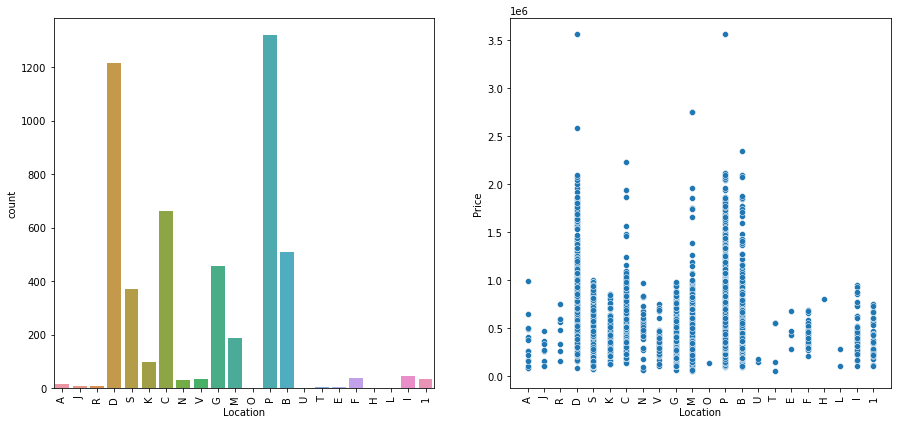

In [98]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(cars['Location'])
plt.xlabel('Location')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'Location', y= 'Price', data= cars)
plt.xlabel('Location')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

In [99]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5047 non-null   object 
 1   Model              5047 non-null   object 
 2   Year               5047 non-null   float64
 3   Fuel               5047 non-null   object 
 4   Driven Kilometers  5047 non-null   float64
 5   Owner              5047 non-null   int64  
 6   Location           5047 non-null   object 
 7   Price              5047 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 315.6+ KB


In [100]:
cars['Brand'].unique()

array(['S', 'A', 'B', 'R', 'C', 'H', 'M', 'T', 'F', 'V', 'J', 'N', 'D',
       'E', 'K'], dtype=object)

In [101]:
cars['Brand'] = cars['Brand'].replace(['S', 'A', 'B', 'R', 'C', 'H', 'M', 'T', 'F', 'V', 'J', 'N', 'D','E', 'K'],
                                       np.arange(0,15))

In [102]:
cars['Model'].unique()

array(['F', 'S', 'T', 'L', 'I', 'A', 'C', 'R', 'E', 'U', 'O', 'J', 'B',
       'N', 'D', 'W', 'V', 'G', 'X', 'M', 'K', 'Y', 'P', 'H', 'Z'],
      dtype=object)

In [103]:
cars['Model'] = cars['Model'].replace(['F', 'S', 'T', 'L', 'I', 'A', 'C', 'R', 'E', 'U', 'O', 'J', 'B',
                                       'N', 'D', 'W', 'V', 'G', 'X', 'M', 'K', 'Y', 'P', 'H', 'Z'], np.arange(0,25))

In [104]:
cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'CNG & HYBRIDS', 'LPG', 'Petrol + CNG',
       'Petrol + LPG'], dtype=object)

In [105]:
cars['Fuel'] = cars['Fuel'].replace(['Petrol', 'Diesel', 'CNG', 'CNG & HYBRIDS', 'LPG', 'Petrol + CNG',
                                     'Petrol + LPG'],np.arange(0,7))

In [106]:
cars['Location'].unique()

array(['A', 'J', 'R', 'D', 'S', 'K', 'C', 'N', 'V', 'G', 'M', 'O', 'P',
       'B', 'U', 'T', 'E', 'F', 'H', 'L', 'I', '1'], dtype=object)

In [107]:
cars['Location'] = cars['Location'].replace(['A', 'J', 'R', 'D', 'S', 'K', 'C', 'N', 'V', 'G', 'M', 'O', 'P',
                                             'B', 'U', 'T', 'E', 'F', 'H', 'L', 'I', '1'],np.arange(0,22))

In [108]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5047 non-null   int32  
 1   Model              5047 non-null   int32  
 2   Year               5047 non-null   float64
 3   Fuel               5047 non-null   int32  
 4   Driven Kilometers  5047 non-null   float64
 5   Owner              5047 non-null   int64  
 6   Location           5047 non-null   int32  
 7   Price              5047 non-null   int64  
dtypes: float64(2), int32(4), int64(2)
memory usage: 236.7 KB


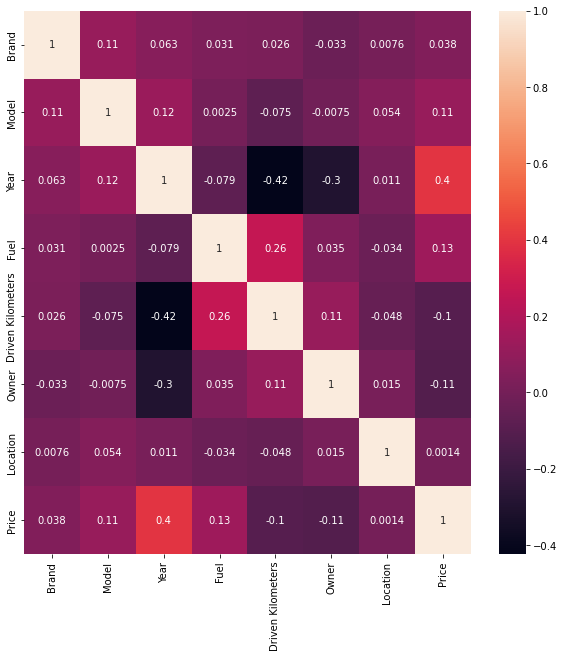

In [109]:
plt.figure(figsize= [10,10])
sns.heatmap(cars.corr(), annot= True)
plt.show()

In [110]:
cars.drop(['Brand'], axis= 1, inplace= True)

In [111]:
X = cars.drop(['Price'], axis= 1)
y = cars['Price']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 135)

In [113]:
scaler = StandardScaler()

In [114]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

1. Linear Regression Model

In [115]:
lr = LinearRegression()
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [116]:
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [117]:
lrf.best_params_

{'n_jobs': 1}

In [118]:
print('Training Score : ', lrf.score(scaledX_train, y_train))
print('Testing Score : ', lrf.score(scaledX_test, y_test))

Training Score :  0.18179496524778915
Testing Score :  0.21046098869764385


2. Decision Tree Regression Model

In [119]:
dt = DecisionTreeRegressor()
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [120]:
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [121]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [122]:
print('Training Score : ', dtf.score(scaledX_train, y_train))
print('Testing Score : ', dtf.score(scaledX_test, y_test))

Training Score :  0.3232156914850228
Testing Score :  0.31635778436691175


In [123]:
rf = RandomForestRegressor()
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [124]:
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [125]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [126]:
print('Training Score : ', rff.score(scaledX_train, y_train))
print('Testing Score : ', rff.score(scaledX_test, y_test))

Training Score :  0.3621672439408222
Testing Score :  0.33955193300791797


4. Bagging Regression Model

In [127]:
br = BaggingRegressor()
brf = GridSearchCV(br, param_grid= {'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [128]:
brf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5]},
             scoring='r2')

In [129]:
brf.best_params_

{'max_features': 2, 'max_samples': 4}

In [130]:
print('Training Score : ', brf.score(scaledX_train, y_train))
print('Testing Score : ', brf.score(scaledX_test, y_test))

Training Score :  -0.11128891995189893
Testing Score :  -0.11384186377987637


#### Selection of best model

In [131]:
rf = RandomForestRegressor()

In [132]:
pred = rf.fit(X_train, y_train).predict(X_test)

In [133]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': np.round(pred,0)})
df.head()

,Actual,Prediction
720,484000,544236.0
73,135000,174470.0
3523,353099,352301.0
2643,1075399,764316.0
2210,658499,691364.0


In [134]:
print('r2 score : ',metrics.r2_score(y_test, pred))

r2 score :  0.44304544318483885


In [135]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

rmse score :  237229.23181199288


In [136]:
print('mae score : ', metrics.mean_absolute_error(y_test, pred))

mae score :  143524.34931061804


#### Saving model

In [137]:
save_m = pickle.dumps(rf)